In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

data_path = "features_and_decisions.csv"

#data_path = r"C:\Users\TORA TECH\Downloads\features_and_decisions.csv"
data=pd.read_csv(data_path)

In [2]:
df = data.iloc[:,:10]
shape=df.shape 
print("Shape:",shape)
print()

print("first rows:")
df.head()

Shape: (6089, 10)

first rows:


,screenshot_title,activity,hearts,light_lvl,in_hand_item,target_mob,decision_activity,decision_hearts,decision_light,decision_mob
0,archering (100).png,archery,11,high,bow,no_mob,give_resistance,give_regeneration_2,no_decision_for_light,no_decision_for_mob
1,archering (108).png,archery,3,high,bow,no_mob,give_resistance,give_regeneration_4,no_decision_for_light,no_decision_for_mob
2,archering (112).png,archery,3,high,bow,no_mob,give_resistance,give_regeneration_4,no_decision_for_light,no_decision_for_mob
3,archering (12).png,archery,20,high,bow,no_mob,give_resistance,no_decision_for_hearts,no_decision_for_light,no_decision_for_mob
4,archering (1546).png,archery,15,high,bow,other,give_resistance,give_regeneration_1,no_decision_for_light,no_decision_for_mob


In [3]:
label_encoder = LabelEncoder()

categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])


df['screenshot_title'] = label_encoder.fit_transform(df['screenshot_title'])

In [4]:
df.head(5)

,screenshot_title,activity,hearts,light_lvl,in_hand_item,target_mob,decision_activity,decision_hearts,decision_light,decision_mob
0,1,0,11,0,2,2,2,1,0,1
1,7,0,3,0,2,2,2,3,0,1
2,11,0,3,0,2,2,2,3,0,1
3,17,0,20,0,2,2,2,4,0,1
4,53,0,15,0,2,3,2,0,0,1


In [5]:
df['decision_mob'].value_counts()

decision_mob
1    4591
3     730
2     569
0     199
Name: count, dtype: int64

In [6]:
df.dtypes
df.isnull().sum()
# df.fillna(df.mean())

screenshot_title     0
activity             0
hearts               0
light_lvl            0
in_hand_item         0
target_mob           0
decision_activity    0
decision_hearts      0
decision_light       0
decision_mob         0
dtype: int64

In [7]:
df.duplicated().sum()


7

In [8]:
df.drop_duplicates(keep='first', inplace=True)

In [9]:
X = df.drop(columns=['decision_mob'])
Y = df['decision_mob']
scaler =  StandardScaler()
X = scaler.fit_transform(X)

In [10]:
X.shape


(6082, 9)

In [11]:
Y.shape

(6082,)

In [12]:
x_train,x_test,y_train,y_test =train_test_split(X,Y,test_size=0.2,random_state=42)

In [13]:
x_train.shape

(4865, 9)

In [14]:
x_test.shape

(1217, 9)

In [15]:
y_train.shape

(4865,)

In [16]:
y_test.shape

(1217,)

In [17]:
xgboost_Model = xgb.XGBClassifier() #XGBClassifier() this is a method in xgboost model
xgboost_Model.fit(x_train,y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [18]:
y_predict=xgboost_Model.predict(x_test)
accuracy = accuracy_score(y_test,y_predict)
print("Accuracy of xgboost without tuning any hyperparameter:",accuracy)

Accuracy of xgboost without tuning any hyperparameter: 0.9917830731306492


In [19]:


param_grid = {
    'n_estimators': [70,80,50,90,100],  
    'max_depth': [4, 5],  
    'learning_rate': [0.09,0.1],  
    'subsample': [0.8, 0.9],  
    'min_child_weight': [1, 2],  # Small adjustment in min_child_weight
    'gamma': [0, 0.1],  # Small adjustment to gamma
    'colsample_bytree': [0.8]  # Focus on one value for simplicity
}




In [20]:
gridSearch =GridSearchCV(estimator=xgboost_Model,param_grid=param_grid, cv=3,error_score='raise', n_jobs=-1, verbose=1)

In [21]:
gridSearch.fit(x_train,y_train)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


C:\Users\TORA TECH\AppData\Roaming\Python\Python311\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=3, error_score='raise',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='multi:softprob', ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8], 'gamma': [0, 0.1],
                         'learning_rate': [0.09, 0.1], 'max_depth': [4, 5],
                         'min_child_weight': [1, 2],
                         'n_estimators': [70, 80, 50, 90, 100],
                         'subsample': [0.8, 0.9]},
             verbose=1)

In [22]:
gridSearch.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.1,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 90,
 'subsample': 0.8}

In [23]:
randomizedSearch = RandomizedSearchCV(estimator = xgboost_Model, param_distributions = param_grid, n_iter=50, cv=5, n_jobs=-1, verbose=1)

In [24]:
randomizedSearch.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           objective='multi:softprob', ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8],
                                        'gamma': [0, 0.1],
                                        'learning_rate': [0.09, 0.1],
                                        'max_depth': [4, 5],
                                        'min_child_weight': [1, 2],
                                        'n_estimators': [70, 80, 50, 90, 100],
                                        'subsample': [0.8, 0.9]},
                   verbose=1)

In [25]:

best_parameters=randomizedSearch.best_params_
best_parameters

{'subsample': 0.8,
 'n_estimators': 100,
 'min_child_weight': 1,
 'max_depth': 4,
 'learning_rate': 0.09,
 'gamma': 0.1,
 'colsample_bytree': 0.8}

In [26]:
"checking accuracy and score for gridsearch and randomized search"
"on training data"





'on training data'

In [27]:
gridSearch.score(x_train,y_train)

0.9975334018499487

In [28]:
"on testing data"
gridSearch.score(x_test,y_test)

0.9926047658175843

In [29]:
"through randomized search , on training data"

'through randomized search , on training data'

In [30]:
randomizedSearch.score(x_train,y_train)

0.9965056526207605

In [31]:
"on test data"

'on test data'

In [32]:
randomizedSearch.score(x_test,y_test)

0.9934264585045193

In [33]:
best_XGboost_model =xgb.XGBClassifier(**randomizedSearch.best_params_)

In [34]:
best_XGboost_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.09, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [35]:
"testing the best xgboost model to make predictions on test data"

'testing the best xgboost model to make predictions on test data'

In [36]:
y_pred=best_XGboost_model.predict(x_test)

In [37]:
accuracy=best_XGboost_model.score(x_test,y_test)
accuracy

0.9934264585045193

In [38]:
y_prob = best_XGboost_model.predict_proba(x_test)


In [39]:
roc_auc=roc_auc_score(y_test,y_prob,multi_class='ovr')

In [40]:
roc_auc

0.9999448439698602

In [41]:
print("Classification Report of XGBoost : \n",classification_report(y_test, y_pred))

Classification Report of XGBoost : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.99      1.00      1.00       924
           2       1.00      0.99      0.99       100
           3       0.99      0.97      0.98       154

    accuracy                           0.99      1217
   macro avg       1.00      0.99      0.99      1217
weighted avg       0.99      0.99      0.99      1217



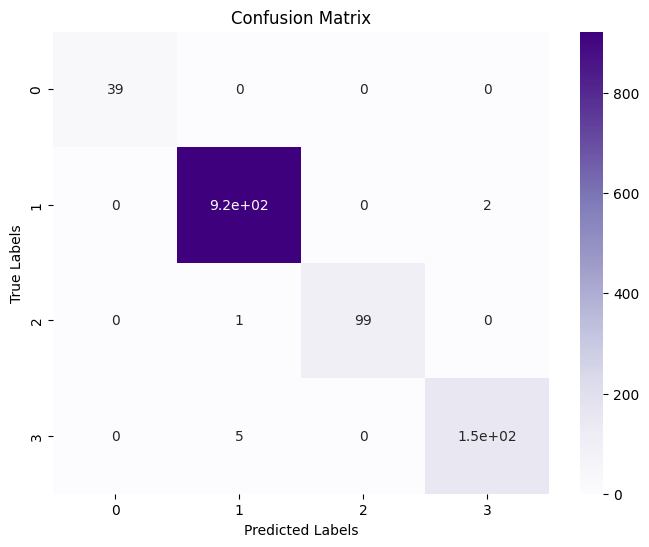

In [42]:
confusion_Matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(confusion_Matrix, annot=True,cmap='Purples', xticklabels=[0,1,2,3], yticklabels=[0,1,2,3])


plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

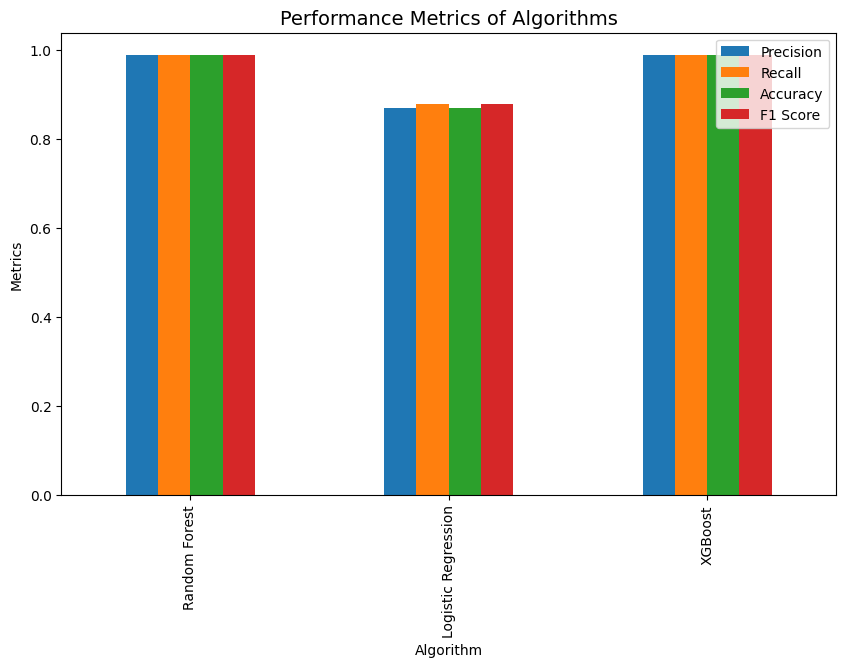

In [43]:

data = {
    'Algorithm': ['Random Forest', 'Logistic Regression', 'XGBoost'],
    'Precision': [0.99, 0.87, 0.99],
    'Recall': [0.99, 0.88, 0.99],
    'Accuracy': [0.99, 0.87, 0.99],
    'F1 Score': [0.99, 0.88, 0.99]
}


df = pd.DataFrame(data)
df.set_index('Algorithm').plot(kind='bar', figsize=(10, 6))

plt.title('Performance Metrics of Algorithms', fontsize=14)
plt.ylabel('Metrics')
plt.show()

